<a href="https://colab.research.google.com/github/Oswatik/ANPR/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!nvcc  --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [14]:
!pip install easyocr  # easyocr is a pretrained image to text model. It supports multiple languages
!pip install imutils
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import imutils
import easyocr
import cv2

In [16]:
img = cv2.imread('/anpr.jpg')

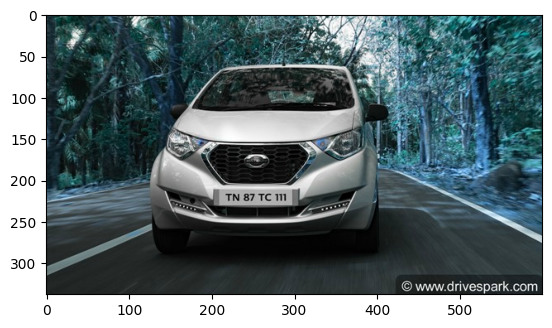

In [17]:
plt.imshow(img)

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

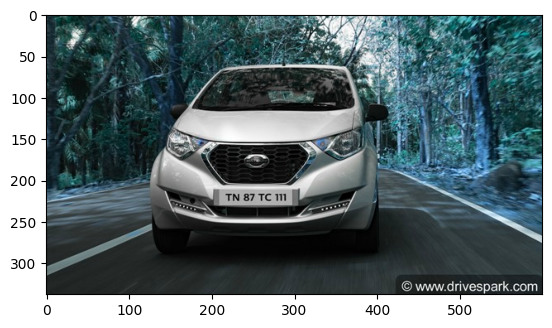

In [19]:
plt.imshow(img)

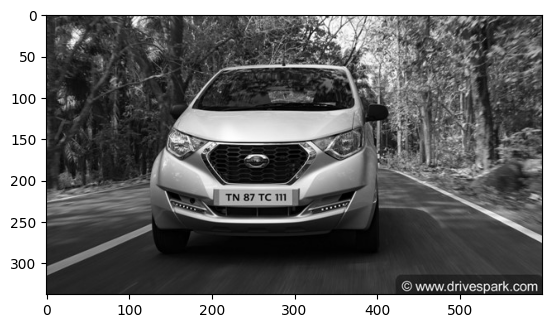

In [20]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

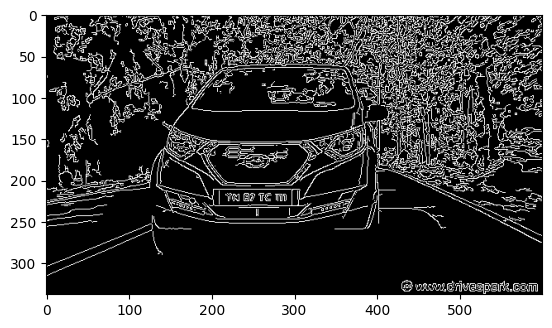

In [21]:
bfilter = cv2.bilateralFilter(gray, 11 ,17, 17)  # Noise reduction
edged = cv2.Canny(bfilter, 30, 200)    # edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [22]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [23]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx

In [24]:
location

array([[[202, 212]],

       [[296, 211]],

       [[297, 230]],

       [[204, 231]]], dtype=int32)

In [25]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

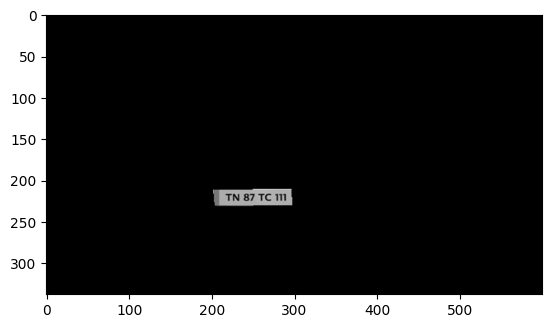

In [26]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [27]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))

In [28]:
cropped_image = gray[x1:x2+1, y1:y2+1]

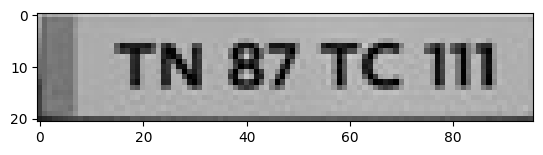

In [29]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [30]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [31]:
result

[([[15, 3], [93, 3], [93, 19], [15, 19]], 'TN 87 TC 111', 0.9245220586291801)]

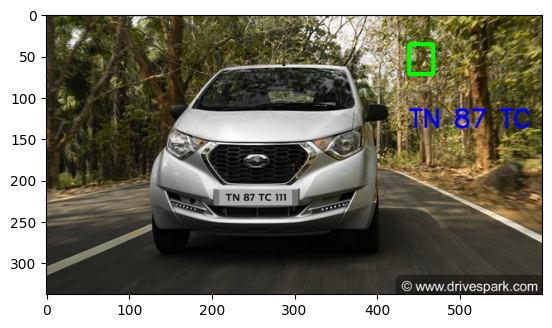

In [32]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text= text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale=1, color =(255,0,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))